In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
# Generate synthetic time series data
def generate_synthetic_data(timesteps):
    time = np.arange(0, timesteps)
    data = np.sin(0.1 * time) + np.random.normal(0, 0.1, timesteps)
    return data

In [3]:
# Prepare the dataset
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)


In [4]:
# Generate data
timesteps = 200
data = generate_synthetic_data(timesteps)
data = data.reshape(-1, 1)


In [5]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [6]:
# Create training and testing datasets
time_step = 10
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM


In [7]:
# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [10]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2435
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0510  
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0745  
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0407 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0438 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0422 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0353 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0368  
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0391 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0269 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0304 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0314
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0293
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0298
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0290
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━

In [11]:
# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Inverse scaling


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 495ms/step


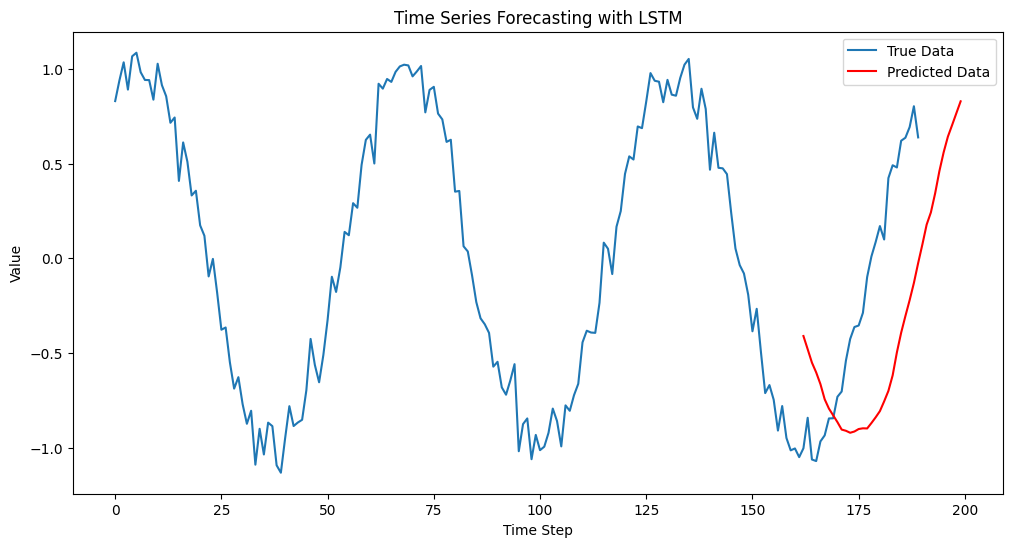

In [12]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data_scaled[time_step:]), label='True Data')
plt.plot(range(train_size + time_step, train_size + time_step + len(predicted)), predicted, label='Predicted Data', color='red')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Time Series Forecasting with LSTM')
plt.legend()
plt.show()